In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from scipy.stats import kurtosis, skew

# preprocessing and pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder


# sklearn libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,
    VotingRegressor, StackingRegressor
)

# sklearn metrics
from sklearn.metrics import r2_score, mean_squared_error
from extended_sklearn_metrics import evaluate_model_with_cross_validation

# extra model
import xgboost as xgb

In [3]:
path = "Latest_Data_Science_Salaries.csv"
df = pd.read_csv(path)

In [4]:
df.isna().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3300 non-null   object
 1   Employment Type     3300 non-null   object
 2   Experience Level    3300 non-null   object
 3   Expertise Level     3300 non-null   object
 4   Salary              3300 non-null   int64 
 5   Salary Currency     3300 non-null   object
 6   Company Location    3300 non-null   object
 7   Salary in USD       3300 non-null   int64 
 8   Employee Residence  3300 non-null   object
 9   Company Size        3300 non-null   object
 10  Year                3300 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 283.7+ KB


In [7]:
df.shape

(3300, 11)

In [8]:
df.columns

Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')

In [9]:
df['Employment Type'].unique()

array(['Full-Time', 'Contract', 'Part-Time', 'Freelance'], dtype=object)

In [10]:
df['Experience Level'].unique()

array(['Senior', 'Mid', 'Executive', 'Entry'], dtype=object)

In [11]:
df['Expertise Level'].unique()

array(['Expert', 'Intermediate', 'Director', 'Junior'], dtype=object)

In [12]:
df['Company Size'].unique()

array(['Medium', 'Large', 'Small'], dtype=object)

In [13]:
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


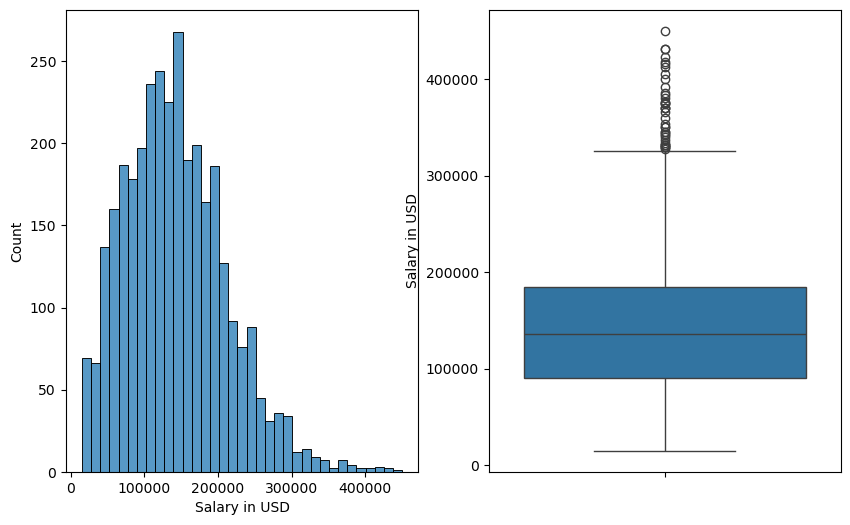

In [14]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.histplot(df['Salary in USD'])
plt.subplot(122)
sns.boxplot(df['Salary in USD'])
plt.show()

In [15]:
df['Salary in USD'].skew()

0.6478282544566119

In [16]:
df.columns

Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')

In [17]:
encoder = LabelEncoder()

In [18]:
categorical_cols = ['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
                    'Salary Currency', 'Company Location', 'Employee Residence', 'Company Size']

for col in categorical_cols:
    df[col+'_encoded'] = encoder.fit_transform(df[col])


In [19]:
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year,Job Title_encoded,Employment Type_encoded,Experience Level_encoded,Expertise Level_encoded,Salary Currency_encoded,Company Location_encoded,Employee Residence_encoded,Company Size_encoded
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023,39,2,3,1,21,70,80,1
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023,39,2,3,1,21,70,80,1
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023,39,2,3,1,21,70,80,1
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023,39,2,3,1,21,70,80,1
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023,59,2,3,1,21,70,80,1


In [21]:
corr1 = df[['Job Title_encoded','Employment Type_encoded','Experience Level_encoded','Expertise Level_encoded','Company Location_encoded','Company Size_encoded','Salary in USD']].corr()

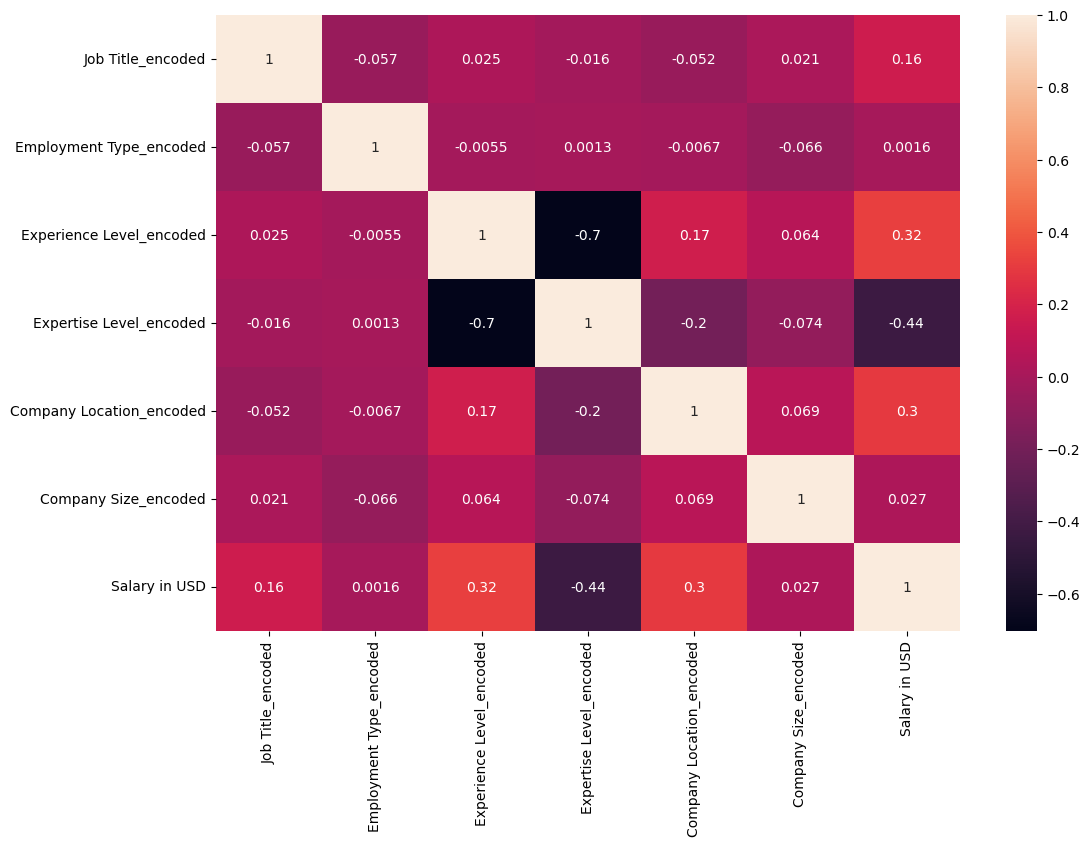

In [23]:
plt.figure(figsize=(12,8))
# corr = df.corr(numeric_only=True)
sns.heatmap(corr1,annot=True)
plt.show()

In [52]:
x = df[['Salary in USD','Company Location_encoded','Job Title_encoded','Experience Level_encoded']]
y = df['Salary in USD']
x

,Salary in USD,Company Location_encoded,Job Title_encoded,Experience Level_encoded
0,210000,70,39,3
1,165000,70,39,3
2,185900,70,39,3
3,129300,70,39,3
4,140000,70,59,3
...,...,...,...,...
3295,412000,70,59,3
3296,151000,70,100,2
3297,105000,70,59,0
3298,100000,70,19,0


In [133]:
scaler = StandardScaler()

In [172]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=24)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   model     9 non-null      object 
 1   R2_score  9 non-null      float64
 2   MSE       9 non-null      float64
dtypes: float64(2), object(1)
memory usage: 348.0+ bytes


In [176]:
cat_cols = x.select_dtypes(include='category').columns.tolist()
cat_cols

[]

In [178]:
preprocessor = ColumnTransformer([('cat',OneHotEncoder(drop='first'),cat_cols)],remainder='passthrough')

In [180]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Support Vector Regression': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'KNN Regression': KNeighborsRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'XGBoost Regression': xgb.XGBRegressor()
}

In [182]:
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor',preprocessor),
        ('regressor',model)
    ])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    results.append({
        'model':name,
        'R2_score':r2_score(y_test,y_pred),
        'MSE': mean_squared_error(y_test,y_pred)
    })

In [183]:
df = pd.DataFrame(results)
df.sort_values(by='R2_score',ascending = False)

,model,R2_score,MSE
0,Linear Regression,1.000000,2.053132e-21
1,Ridge Regression,1.000000,3.120269e-17
2,Lasso Regression,1.000000,1.965252e-10
6,Random Forest Regression,0.999993,3.126107e+04
5,KNN Regression,0.999987,5.878920e+04
4,Decision Tree Regression,0.999978,1.000882e+05
8,XGBoost Regression,0.999657,1.545819e+06
7,AdaBoost Regression,0.991258,3.941774e+07
3,Support Vector Regression,0.012464,4.452797e+09
